done after n_iterations=7 with n_panels=64


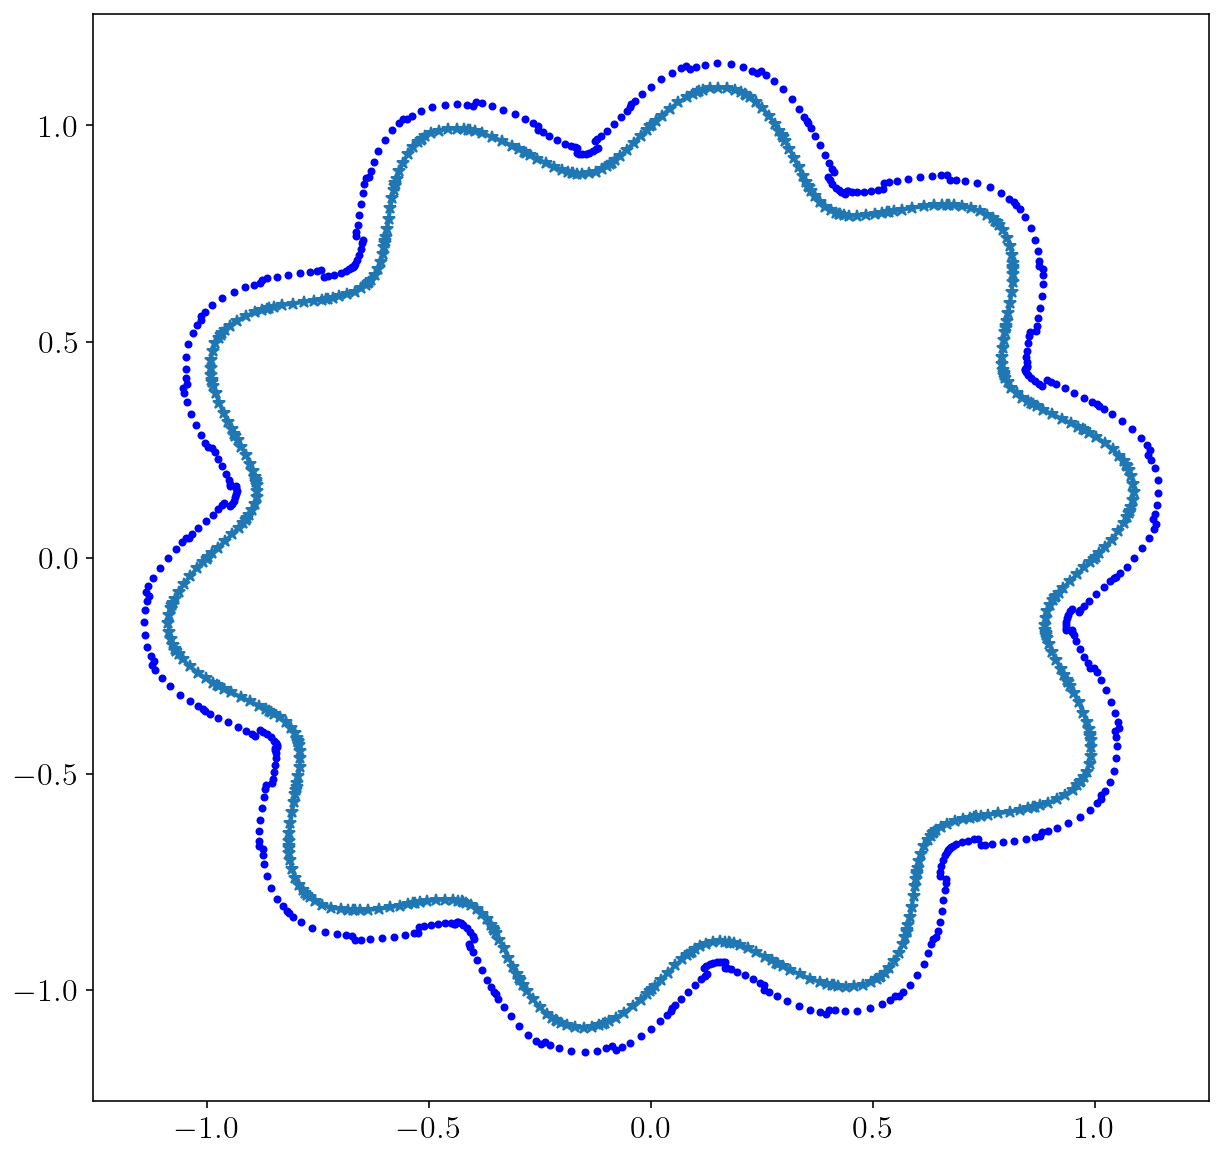

64


In [72]:
t = sp.var("t")
qx, qw = gauss_rule(8)
A = (1 + 0.1 * sp.sin(10 * sp.pi * t))
free = stage1_refine(
    (t, A * sp.cos(sp.pi * t), A * sp.sin(sp.pi * t)), (qx, qw),
    max_radius_ratio=2.0
)
free_expansions = qbx_panel_setup(free, other_surfaces=[], direction=-1, p=10)
plt.figure(figsize=(10,10))
plt.plot(free.pts[:,0], free.pts[:,1], '-*')
plt.plot(free_expansions.pts[:,0], free_expansions.pts[:,1], 'b.')
plt.show()
print(free.n_panels)

In [73]:
free_stage2, free_interp_mat = stage2_refine(free, free_expansions)
M = qbx_matrix(double_layer_matrix, free_stage2, free.pts, free_expansions)[:,0,:].dot(free_interp_mat.toarray())
M.dot(np.ones(M.shape[1]))

array([ 1.22519482e-08, -1.27396970e-08, -6.93139712e-09,  1.25797248e-08,
       -1.13294473e-08,  3.22069241e-09,  1.41207238e-08,  1.09193780e-07,
        1.87921943e-07, -4.86016702e-07,  6.11891818e-07, -7.11673727e-07,
        7.21103859e-07, -6.05668280e-07,  1.75728306e-07,  2.51952027e-07,
        6.53278147e-08, -1.04783020e-07,  9.80284389e-08, -1.19530077e-07,
        1.23487277e-07, -9.52401766e-08,  3.61305778e-08,  1.79464658e-08,
        2.07413828e-09,  1.05851733e-08, -3.54497147e-08,  4.73080930e-08,
       -4.85604189e-08,  5.38800446e-08, -1.20846244e-07, -3.83988495e-08,
       -3.57732498e-07,  1.27472688e-06, -1.74699860e-06,  2.08766369e-06,
       -2.10747965e-06,  1.12728665e-06,  3.79355037e-08, -6.49579805e-07,
       -2.47954112e-07, -1.31910349e-07, -3.35155078e-07,  6.65171097e-07,
       -6.74911883e-07,  5.24325536e-07, -3.29327861e-07,  5.47585565e-08,
        2.49020661e-08,  2.45097865e-08,  7.61986507e-09, -1.61918084e-08,
        1.64125543e-08, -